Shapelyを用いてジオメトリを生成・操作する方法を述べる。


Point: 空間内の点を表すオブジェクト。(x,y)か(x,y,z)で指定。

LineString: 直線を表すオブジェクト。結節点となる点の列で指定する。点は，タプルで指定する。

Polygon: 3つ以上の座標タプルで指定する。

### 複数のジオメトリオブジェクト
ジオメトリオブジェクトは，複数持つことができる。

MultiPoint: Pointのコレクション

MultiLineString: Lineのコレクション

MultiPolygon: Polygonのコレクション

In [2]:
!pip install shapely

In [3]:
from shapely.geometry import Point, LineString,Polygon
point1=Point(2.2,4.2)
point2=Point(7.2,-25.1)
point3=Point(9.26,-2.456)
point3D=Point(9.26,-2.456,0.57) #3次元空間内の点。
print(point1)
print(point3D)

POINT (2.2 4.2)
POINT Z (9.26 -2.456 0.57)


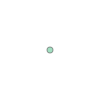

In [4]:
point1

データ型は，typeで確認できる。

In [5]:
type(point1)

shapely.geometry.point.Point

#### 属性
shapelyのオブジェクトは，属性を持つので，それらの値を使って，距離などを計算することができる。

In [7]:
print(point1.geom_type)
list(point1.coords) #属性coordsをリストとして表示する。

Point


[(2.2, 4.2)]

`Point`オブジェクトの属性`x`と`y`の値としてx座標y座標を取り出すことができる。

In [8]:
x,y=point1.x,point1.y
print(x,y)

2.2 4.2


これらの属性を用いると，2点間の距離を計算することができる。

In [9]:
# Calculate the distance between point1 and point2
dist = point1.distance(point2)
# Print out a nicely formatted info message
print("Distance between the points is {0:.2f} units".format(dist))

Distance between the points is 29.72 units


### LineString

In [10]:
line=LineString([point1,point2,point3])
line2 = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

`print`すると，座標を確認することができる。

In [11]:
print(line)

LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)


#### 属性
LineStringh複数の属性を持つ。これらを用いると，LineString　を構成する線分の長さや他の点からの距離などを求めることができる。

In [12]:
list(line.coords)

[(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)]

全ての線分の座標をまとめてとりだすには，属性xyを用いる。

In [13]:
# Extract x and y coordinates separately
xcoords = list(line.xy[0])
ycoords = list(line.xy[1])
print(xcoords)
print(ycoords)

[2.2, 7.2, 9.26]
[4.2, -25.1, -2.456]


長さを取り出すには，lengthを用いる。

In [14]:
# Get the lenght of the line
l_length = line.length
print("Length of our line: {0:.2f} units".format(l_length))

Length of our line: 52.46 units


Pointを直に用いることはできない。
###  Polygon
Polygonは3つ以上の座標タプルが必要である。Pointを直に用いることはできない。

In [15]:
# Create a Polygon from the coordinates
poly = Polygon([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

すでに存在するPointからPolygonを生成するには，Pointから座標を取り出すとよい。

In [16]:
[[p.x, p.y] for p in [point1, point2, point3]]
# Create a Polygon based on information from the Shapely points
poly2 = Polygon([[p.x, p.y] for p in [point1, point2, point3]])
[[p.x, p.y] for p in [point1, point2, point3]]

[[2.2, 4.2], [7.2, -25.1], [9.26, -2.456]]

これらのポリゴンを可視化すると，次のようになる。

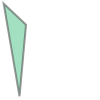

In [17]:
poly

In [18]:
print(poly)

POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))


Polygonのタイプは，Polygonである。

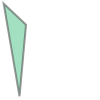

In [19]:
poly

In [20]:
type(poly)

shapely.geometry.polygon.Polygon

In [21]:
poly.geom_type

'Polygon'

穴の空いたポリゴンを生成することもできる。

In [22]:
# 外側の境界を定義する
border = [(-180, 90), (-180, -90), (180, -90), (180, 90)]
# Outer polygon
world = Polygon(shell=border)
print(world)

POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90))


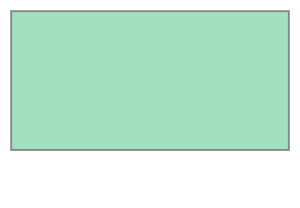

In [23]:
world

In [24]:
#境界から10単位離れた位置に穴をあける
hole = [[(-170, 80), (-170, -80), (170, -80), (170, 80)]]
#holeで定められた穴を開けた長方形を生成する
frame = Polygon(shell=border, holes=hole)
print(frame)

POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90), (-170 80, -170 -80, 170 -80, 170 80, -170 80))


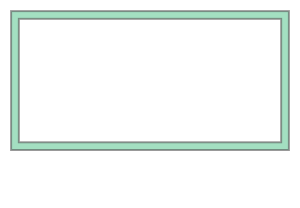

In [25]:
frame

#### Polygonの属性

Polygonは，area,centroid,bounding,box,exterior,exterior-lengthという関数を持つ。

In [27]:
# Print the outputs
print("Polygon centroid: ", world.centroid)
print("Polygon Area: ",  world.area)
print("Polygon Bounding Box: ", world.bounds)
print("Polygon Exterior: ", world.exterior)
print("Polygon Exterior Length: ", world.exterior.length)

Polygon centroid:  POINT (-0 -0)
Polygon Area:  64800.0
Polygon Bounding Box:  (-180.0, -90.0, 180.0, 90.0)
Polygon Exterior:  LINEARRING (-180 90, -180 -90, 180 -90, 180 90, -180 90)
Polygon Exterior Length:  1080.0


いくつかの多角形の例を示す。

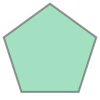

In [28]:
# Pentagon - Coordinates borrowed from this thread: https://tex.stackexchange.com/questions/179843/make-a-polygon-with-automatically-labelled-nodes-according-to-their-coordinates
Polygon([(30, 2.01), (31.91, 0.62), (31.18, -1.63), (28.82, -1.63), (28.09, 0.62)])

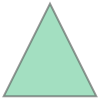

In [29]:
# Triangle
Polygon([(0,0), (2,4), (4,0)])

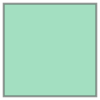

In [30]:
# Square
Polygon([(0,0), (0,4), (4,4), (4,0)])

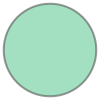

In [31]:
# Circle (using a buffer around a point)
point = Point((0,0))
point.buffer(1)